In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [ ]:
!pip install python-Levenshtein
!pip install sklearn
!pip install pyLDAvis
!pip install gensim pyldavis
!pip install preprocessor
!pip install rake-nltk
!pip install umap-learn
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install --upgrade ipykernel
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import warnings
import pandas as pd
import numpy as np
import io

import tweepy
import csv
import preprocessor as p

import string
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

from pprint import pprint
import spacy

import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import LdaMulticore,Word2Vec, FastText, CoherenceModel, LdaModel

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cosine

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import pickle
from tqdm import tqdm

import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from rake_nltk import Rake


import umap
from umap import UMAP
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase

import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## 1. Text pre-processing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/NFT/NBATS201001_230218_USonly_10000.csv")
#removing unwanted columns for this analysis
#df.drop(columns = ['id', 'created_at', 'author_id','in_reply_to_user_id', 'lang', 'author', 'entities', 'referenced_tweets', 'media', 'geo'], inplace = True)
print(df.text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


0       @NBA Had to grab his #forthewin @NBATopShot mo...
1         @NBATopShot New Wave TS:Hilly6  #NBATopShotThis
2                    @NBATopShot Team OG # NBATopShotThis
3       @NBATopShot can you do this ? https://t.co/ixR...
4       @GhanaMamba @jobenscott @UsmanPatel_ @NBATopSh...
                              ...                        
9995    @StephSutto @nbatopshot @CP3 TS: BayAreaWarrio...
9996    @BlockchainSteve @TheFirstMint @nbatopshot Gre...
9997                  @StephSutto @nbatopshot @CP3 Wolves
9998    @StephSutto @retroblockchain @nbatopshot @CP3 ...
9999    @StephSutto @nbatopshot @CP3 Those are two gre...
Name: text, Length: 10000, dtype: object


In [ ]:
# Import necessary libraries
import spacy
import re
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

# Initialize tokenizer and spaCy model
tokenizer = TweetTokenizer()
nlp = spacy.load('en_core_web_sm')

# Example contractions dictionary
contractions = {
    "idk": "i do not know",
    "imho": "in my humble opinion",
    "lol": "laughing out loud",
    "u": "you",
    "r": "are",
    "wanna": "want to",
    "gonna": "going to",
    "btw": "by the way",
    "tbh": "to be honest",
    "omg": "oh my god",
    "brb": "be right back",
    "bff": "best friends forever",
    "i'm": "i am",
    "i’m": "i am",  # Added this line to handle different apostrophe
    "you're": "you are",
    "you’re": "you are",  # Added this line to handle different apostrophe
    "they're": "they are",
    "they’re": "they are",  # Added this line to handle different apostrophe
    "it's": "it is",
    "it’s": "it is",  # Added this line to handle different apostrophe
    "we're": "we are",
    "we’re": "we are",  # Added this line to handle different apostrophe
    "isn't": "is not",
    "isn’t": "is not",  # Added this line to handle different apostrophe
    "don't": "do not",
    "don’t": "do not",  # Added this line to handle different apostrophe
    "can't": "cannot",
    "can’t": "cannot",  # Added this line to handle different apostrophe
    "won't": "will not",
    "won’t": "will not",  # Added this line to handle different apostrophe
    "doesn't": "does not",
    "doesn’t": "does not",  # Added this line to handle different apostrophe
    "i've": "i have",
    "i’ve": "i have",  # Added this line to handle different apostrophe
    "you've": "you have",
    "you’ve": "you have",  # Added this line to handle different apostrophe
    "we've": "we have",
    "we’ve": "we have",  # Added this line to handle different apostrophe
    "they've": "they have",
    "they’ve": "they have",  # Added this line to handle different apostrophe
    "i'll": "i will",
    "i’ll": "i will",  # Added this line to handle different apostrophe
    "you'll": "you will",
    "you’ll": "you will",  # Added this line to handle different apostrophe
    "they'll": "they will",
    "they’ll": "they will",  # Added this line to handle different apostrophe
    "i'd": "i would",
    "i’d": "i would",  # Added this line to handle different apostrophe
    "you'd": "you would",
    "you’d": "you would",  # Added this line to handle different apostrophe
    "they'd": "they would",
    "they’d": "they would",  # Added this line to handle different apostrophe
    "he's": "he is",
    "he’s": "he is",  # Added this line to handle different apostrophe
    "she's": "she is",
    "she’s": "she is",  # Added this line to handle different apostrophe
    "that's": "that is",
    "that’s": "that is",  # Added this line to handle different apostrophe
    "there's": "there is",
    "there’s": "there is",  # Added this line to handle different apostrophe
    "who's": "who is",
    "who’s": "who is",  # Added this line to handle different apostrophe
    "let's": "let us",
    "let’s": "let us",  # Added this line to handle different apostrophe
}

# Create a set of stopwords including contraction keys and their expansions
nltk_stopwords = set(stopwords.words('english'))
twitter_stopwords = {"rt", "t.co", "fav", "follow", "amp", "retw", "retweet", "w/", "w"}  # Common Twitter-specific words
custom_stopwords = set(contractions.keys())  # Add contraction keys
for contraction in contractions.values():
    custom_stopwords.update(contraction.split())  # Add expanded contraction words

# Add "nbatopshot" to custom stopwords
custom_stopwords.update(["nbatopshot", "nft", "nbats", "ts", "bayareawarrior"])

# Combine all stopwords
all_stopwords = nltk_stopwords.union(twitter_stopwords).union(custom_stopwords)

# Initialize TweetTokenizer for better handling of social media text
tokenizer = TweetTokenizer()

# Preprocessing function
def preprocess_twitter_text(text):
    # Lowercase the text
    text = text.lower()

    # Replace contractions
    for key, value in contractions.items():
        text = re.sub(r'\b' + re.escape(key) + r'\b', value, text)

    # Remove specific terms like "49ers" before tokenization
    #text = re.sub(r'\b49ers\b', '', text)  # Remove "49ers" completely
    #text = re.sub(r'\b49er\b', '', text)  # Remove "49er" completely

    # Remove URLs and replace with empty string
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove user mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (keep only the word part)
    text = re.sub(r'#(\w+)', r'\1', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove emojis and their text representations
    text = re.sub(r'[^\w\s,]', '', text)  # Remove actual emoji characters
    text = re.sub(r':\w+:', '', text)     # Remove emoji descriptions (e.g., ":thinking_face:")

    # Remove underscores
    text = re.sub(r'_', ' ', text)  # Replace underscores with spaces to normalize compound words

    # Remove non-English characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Normalize repeated characters (e.g., "soooo" -> "soo")
    text = re.sub(r'(.)\1+', r'\1\1', text)

    # Tokenize the text
    tokens = tokenizer.tokenize(text)

    # Remove stopwords
    tokens = [token for token in tokens if token not in all_stopwords]

    # Lemmatize the tokens using spaCy
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]

    return lemmatized_tokens

# Example usage
example_tweet = "@jasonmeinzer @NBATopShot I'm the guy bottom right corner"
tokenized_tweet = preprocess_twitter_text(example_tweet)
print(tokenized_tweet)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


['guy', 'bottom', 'corner']


In [ ]:
# Apply preprocessing and tokenization to each comment
df['tokenized_text'] = df['text'].apply(lambda x: preprocess_twitter_text(str(x)))

# Extract the tokenized text into a separate variable if needed
data_ready = df['tokenized_text']

# Print the tokenized output
print(data_ready)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


0                         [grab, forthewin, moment, lock]
1                    [new, wave, tshilly, nbatopshotthis]
2                              [team, og, nbatopshotthis]
3                                                      []
4       [indeed, mint, lebron, legendary, final, momen...
                              ...                        
9995                                                   []
9996                       [greatness, admire, greatness]
9997                                               [wolf]
9998                                               [todd]
9999                     [two, great, moment, shotcaller]
Name: tokenized_text, Length: 10000, dtype: object


## 3. LDA


###Coherence Score

In [ ]:
#Creating a Bag Of Words
from gensim.corpora import Dictionary

# Assuming 'documents' is a list of tokenized documents
text_dict = Dictionary(data_ready)
corpus = [text_dict.doc2bow(doc) for doc in data_ready]

#view integer mappings
text_dict.token2id


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


{'forthewin': 0,
 'grab': 1,
 'lock': 2,
 'moment': 3,
 'nbatopshotthis': 4,
 'new': 5,
 'tshilly': 6,
 'wave': 7,
 'og': 8,
 'team': 9,
 'amazing': 10,
 'another': 11,
 'could': 12,
 'either': 13,
 'final': 14,
 'indeed': 15,
 'last': 16,
 'lebron': 17,
 'legendary': 18,
 'mint': 19,
 'mvp': 20,
 'series': 21,
 'win': 22,
 'congrats': 23,
 'dis': 24,
 'ghana': 25,
 'pfp': 26,
 'app': 27,
 'hard': 28,
 'hope': 29,
 'like': 30,
 'mobile': 31,
 'nail': 32,
 'push': 33,
 'really': 34,
 'gm': 35,
 'dfs': 36,
 'collection': 37,
 'love': 38,
 'massive': 39,
 'whoa': 40,
 'even': 41,
 'tss': 42,
 'already': 43,
 'barrel': 44,
 'bottom': 45,
 'overflow': 46,
 'people': 47,
 'ticket': 48,
 'trade': 49,
 'amount': 50,
 'close': 51,
 'common': 52,
 'feel': 53,
 'king': 54,
 'little': 55,
 'never': 56,
 'rare': 57,
 'tenth': 58,
 'year': 59,
 'dunk': 60,
 'first': 61,
 'make': 62,
 'maybe': 63,
 'one': 64,
 'snapshot': 65,
 'average': 66,
 'd': 67,
 'embiid': 68,
 'get': 69,
 'give': 70,
 'he': 71

In [ ]:
# Function to compute coherence values for different numbers of topics
def compute_coherence_values(corpus, dictionary, k_min, k_max, step=1):
    coherence_values = []
    topic_nums = list(range(k_min, k_max + 1, step))

    for num_topics in topic_nums:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_lda.get_coherence())

    return topic_nums, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
# Determine the optimal number of topics
k_min, k_max, step = 2, 20, 1
topic_nums, coherence_values = compute_coherence_values(corpus, text_dict, k_min, k_max, step)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


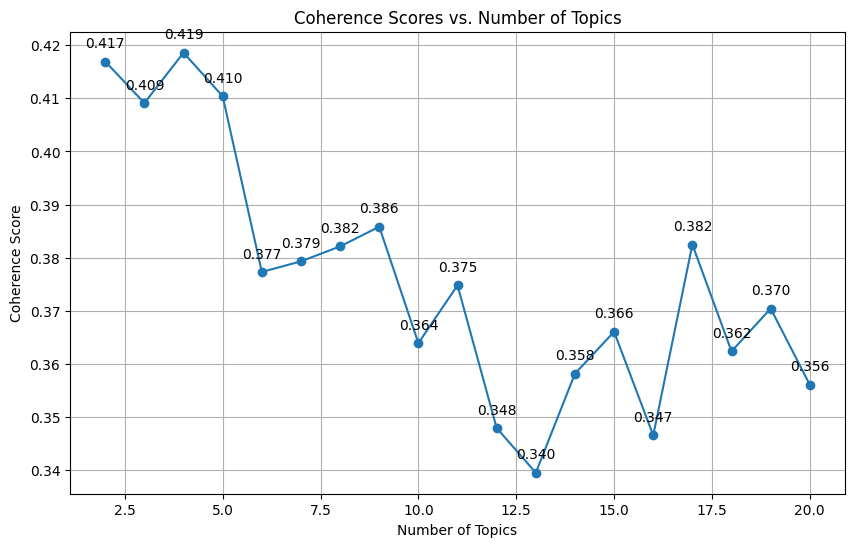

Optimal number of topics: 4


In [ ]:
# Plot coherence score
plt.figure(figsize=(10, 6))
plt.plot(topic_nums, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores vs. Number of Topics")
plt.grid()

# Annotate each point with its coherence score
for i, txt in enumerate(coherence_values):
    plt.annotate(f"{txt:.3f}", (topic_nums[i], coherence_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

optimal_num_topics = topic_nums[np.argmax(coherence_values)]
print(f"Optimal number of topics: {optimal_num_topics}")

###LDA Modeling

In [ ]:
#Fitting the LDA Model
from gensim.models.ldamodel import LdaModel

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=text_dict,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


[(0,
  '0.029*"pack" + 0.024*"love" + 0.020*"see" + 0.019*"time" + 0.016*"check" + '
  '0.015*"drop" + 0.015*"queue" + 0.013*"need" + 0.011*"take" + 0.010*"play"'),
 (1,
  '0.032*"game" + 0.026*"clipper" + 0.022*"th" + 0.017*"thunder" + '
  '0.017*"rocket" + 0.015*"justin" + 0.014*"aaron" + 0.013*"winner" + '
  '0.013*"tonight" + 0.012*"much"'),
 (2,
  '0.050*"get" + 0.021*"one" + 0.016*"first" + 0.015*"not" + 0.015*"fan" + '
  '0.015*"buy" + 0.013*"make" + 0.013*"rare" + 0.013*"good" + 0.012*"think"'),
 (3,
  '0.130*"nbatopshotthis" + 0.055*"moment" + 0.048*"shotcaller" + 0.025*"like" '
  '+ 0.019*"sun" + 0.017*"thank" + 0.011*"new" + 0.011*"win" + '
  '0.011*"showcase" + 0.011*"giannis"')]


In [ ]:
def save_pkl(path, data) :
  '''
  params
  path: "filename.pkl" -- change filename(the saving location)
  data: data you want to save
  '''
  with open(path, 'wb') as f :
    pickle.dump(data, f)

  return "Save success at {}".format(path)

def load_pkl(path) :

  '''
  path: loacation for saved pickle file
  '''

  with open(path, 'rb') as f:
    data = pickle.load(f)

  return data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
#assign to each document
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_ready):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in tqdm(enumerate(ldamodel[corpus])):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

                temp_to_append = pd.DataFrame({'Dominant_Topic':[int(topic_num)], 'Perc_Contribution': [round(prop_topic,4)],
                                               'Topic_Keywords':[topic_keywords]})
                #print(temp_to_append)
                sent_topics_df = pd.concat([sent_topics_df, temp_to_append], ignore_index=False)
                #print(sent_topics_df)

            else:
                break
    print(sent_topics_df.head(10))
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    #with open('sent_topic_df.pkl', 'wb') as f:
    #  pickle.dump(sent_topics_df,f)
    # Add original text to the end of the output
    #contents = list(texts)
    text_temp_df = pd.DataFrame({'Text': list(data_ready)})
    sent_topics_df = sent_topics_df.reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, text_temp_df], axis=1, ignore_index = False)

    return(sent_topics_df)


#df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)
df_dominant_topic = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)


# Format
#df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)
save_pkl("/content/drive/MyDrive/Data/NFT/df_dominant_topic_NBATS.pkl", df_dominant_topic)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
10000it [00:18, 538.28it/s]


   Dominant_Topic  Perc_Contribution  \
0               3             0.5842   
0               3             0.5850   
0               3             0.5627   
0               0             0.2500   
0               3             0.6910   
0               1             0.4924   
0               3             0.4368   
0               1             0.5320   
0               1             0.5674   
0               0             0.6322   

                                      Topic_Keywords  
0  nbatopshotthis, moment, shotcaller, like, sun,...  
0  nbatopshotthis, moment, shotcaller, like, sun,...  
0  nbatopshotthis, moment, shotcaller, like, sun,...  
0  pack, love, see, time, check, drop, queue, nee...  
0  nbatopshotthis, moment, shotcaller, like, sun,...  
0  game, clipper, th, thunder, rocket, justin, aa...  
0  nbatopshotthis, moment, shotcaller, like, sun,...  
0  game, clipper, th, thunder, rocket, justin, aa...  
0  game, clipper, th, thunder, rocket, justin, aa...  
0  pack, 

'Save success at /content/drive/MyDrive/Data/NFT/df_dominant_topic_NBATS.pkl'

In [ ]:
df_dominant_topic.to_csv('/content/drive/My Drive/Data/NFT/NBATS_Twitter.csv', index=False)
data = load_pkl("/content/drive/MyDrive/Data/NFT/df_dominant_topic_NBATS.pkl")
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,3,0.5842,"nbatopshotthis, moment, shotcaller, like, sun,...","[grab, forthewin, moment, lock]"
1,3,0.5850,"nbatopshotthis, moment, shotcaller, like, sun,...","[new, wave, tshilly, nbatopshotthis]"
2,3,0.5627,"nbatopshotthis, moment, shotcaller, like, sun,...","[team, og, nbatopshotthis]"
3,0,0.2500,"pack, love, see, time, check, drop, queue, nee...",[]
4,3,0.6910,"nbatopshotthis, moment, shotcaller, like, sun,...","[indeed, mint, lebron, legendary, final, momen..."
...,...,...,...,...
9995,0,0.2500,"pack, love, see, time, check, drop, queue, nee...",[]
9996,1,0.8125,"game, clipper, th, thunder, rocket, justin, aa...","[greatness, admire, greatness]"
9997,1,0.6250,"game, clipper, th, thunder, rocket, justin, aa...",[wolf]
9998,0,0.6250,"pack, love, see, time, check, drop, queue, nee...",[todd]


In [ ]:
sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')
sent_topics_outdf_grpd
for i, grp in sent_topics_outdf_grpd:
  print(i, grp)

0       Dominant_Topic  Perc_Contribution  \
3                  0             0.2500   
9                  0             0.6322   
14                 0             0.4663   
19                 0             0.7500   
20                 0             0.2500   
...              ...                ...   
9983               0             0.8500   
9992               0             0.2500   
9994               0             0.5820   
9995               0             0.2500   
9998               0             0.6250   

                                         Topic_Keywords  \
3     pack, love, see, time, check, drop, queue, nee...   
9     pack, love, see, time, check, drop, queue, nee...   
14    pack, love, see, time, check, drop, queue, nee...   
19    pack, love, see, time, check, drop, queue, nee...   
20    pack, love, see, time, check, drop, queue, nee...   
...                                                 ...   
9983  pack, love, see, time, check, drop, queue, nee...   
9992  pac

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
#sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ["Topic_Num", "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9344,"pack, love, see, time, check, drop, queue, need, take, play","[nice, able, search, specific, serial, lot, sentimental, connection, certain, number, comination]"
1,1,0.9049,"game, clipper, th, thunder, rocket, justin, aaron, winner, tonight, much","[yep, killian, hayes, rj, hampton, bol, bol]"
2,2,0.9374,"get, one, first, not, fan, buy, make, rare, good, think","[estimate, mm, get, track, assume, nonsuperstar, become, trade, ticket, sound, directionally]"
3,3,0.9284,"nbatopshotthis, moment, shotcaller, like, sun, thank, new, win, showcase, giannis","[choose, doncic, booker, leonard, tatum, gorbert, quite, gobert, choice, nbatopshotthis]"


In [ ]:
print(df_dominant_topic)
df_dominant_topic.to_csv(r'/content/drive/My Drive/Data/NFT/NBATS_Twitter.csv')

      Dominant_Topic  Perc_Contribution  \
0                  3             0.5842   
1                  3             0.5850   
2                  3             0.5627   
3                  0             0.2500   
4                  3             0.6910   
...              ...                ...   
9995               0             0.2500   
9996               1             0.8125   
9997               1             0.6250   
9998               0             0.6250   
9999               3             0.6501   

                                                                         Topic_Keywords  \
0     nbatopshotthis, moment, shotcaller, like, sun, thank, new, win, showcase, giannis   
1     nbatopshotthis, moment, shotcaller, like, sun, thank, new, win, showcase, giannis   
2     nbatopshotthis, moment, shotcaller, like, sun, thank, new, win, showcase, giannis   
3                           pack, love, see, time, check, drop, queue, need, take, play   
4     nbatopshotthis, moment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
# Visualize topics with pyLDAvis
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, text_dict, sort_topics=False)
pyLDAvis.display(lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


### Stability & Perplexity Score Plot

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
# Apply preprocessing
df['tokenized_text'] = df['text'].apply(lambda x: preprocess_twitter_text(str(x)))

# Prepare data for topic modeling (Scikit-Learn expects strings, Gensim expects tokens)
tokenized_texts = df['tokenized_text'].tolist()  # Tokenized texts as lists of tokens
data_ready_sklearn = [' '.join(tokens) for tokens in tokenized_texts]  # Joined tokens for Scikit-Learn

# Step 1: Build Scikit-Learn LDA Model with 3 Topics
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(data_ready_sklearn)

lda_sklearn = LatentDirichletAllocation(n_components=4, learning_decay=0.5, random_state=42)
lda_sklearn.fit(data_vectorized)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


LatentDirichletAllocation(learning_decay=0.5, n_components=4, random_state=42)

###Stability Score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Stability for 2 topics: 0.660317778446066
Stability for 3 topics: 0.5222289817262452
Stability for 4 topics: 0.46682007275767023
Stability for 5 topics: 0.43063054359078157
Stability for 6 topics: 0.3902778575659074
Stability score for the optimal number of topics (4): 0.46682007275767023


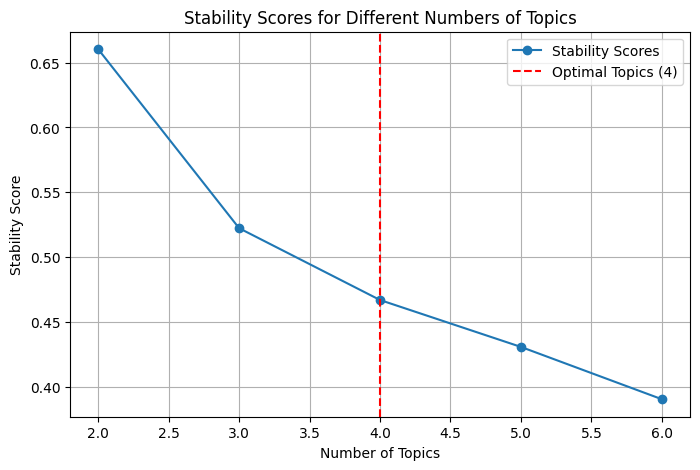

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate stability score for a given number of topics
def calculate_stability(n_components, data, n_runs=5, random_states=range(5)):
    topic_distributions = []
    for seed in random_states:
        lda_temp = LatentDirichletAllocation(n_components=n_components, random_state=seed)
        lda_temp.fit(data)
        topic_distributions.append(lda_temp.components_)

    # Compute pairwise cosine similarities between consecutive topic matrices
    pairwise_similarities = [
        cosine_similarity(a, b).mean()
        for a, b in zip(topic_distributions[:-1], topic_distributions[1:])
    ]
    # Return average stability score
    return np.mean(pairwise_similarities)

# Range of topics to evaluate (focused around the optimal number)
topic_range = range(2, 7)  # From 2 to 5 topics
stability_scores = []

# Calculate stability for each number of topics
for n_topics in topic_range:
    score = calculate_stability(n_components=n_topics, data=data_vectorized)
    stability_scores.append(score)
    print(f"Stability for {n_topics} topics: {score}")

# Specific stability for the optimal number of topics (4)
optimal_topics = 4
optimal_score = calculate_stability(n_components=optimal_topics, data=data_vectorized)
print(f"Stability score for the optimal number of topics ({optimal_topics}): {optimal_score}")

# Plot stability scores
plt.figure(figsize=(8, 5))
plt.plot(topic_range, stability_scores, marker='o', linestyle='-', label="Stability Scores")
plt.axvline(x=optimal_topics, color='red', linestyle='--', label=f"Optimal Topics ({optimal_topics})")
plt.title("Stability Scores for Different Numbers of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Stability Score")
plt.grid(True)
plt.legend()
plt.show()

###Perplexity Score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Topics: 2, Perplexity: 3.694833048144749
Topics: 3, Perplexity: 5.500819500532075
Topics: 4, Perplexity: 7.302639630440579
Topics: 5, Perplexity: 9.055226494982604
Topics: 6, Perplexity: 10.776866518046404
Topics: 7, Perplexity: 14.410422407303049
Optimal Number of Topics: 4, Perplexity: 7.302639630440579


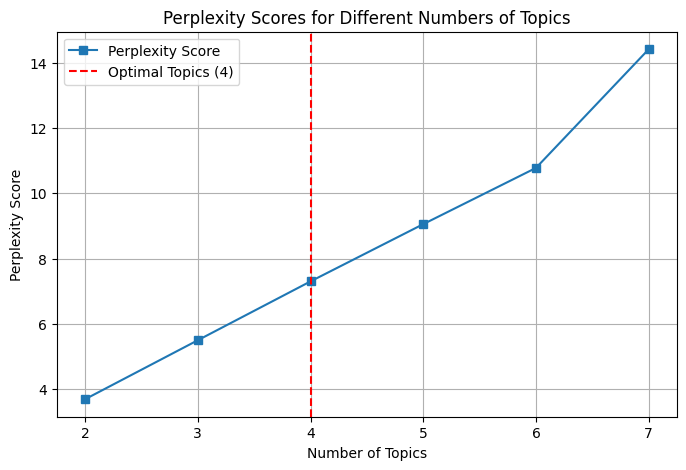

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Example data
data_ready_sklearn = ["sample text data", "another sample text", "more text data for LDA"]

# Vectorize data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(data_ready_sklearn)

# Function to calculate perplexity score
def calculate_perplexity(n_components, data):
    lda_temp = LatentDirichletAllocation(n_components=n_components, random_state=42)
    lda_temp.fit(data)
    return lda_temp.perplexity(data)

# Range of topics to evaluate (focused around the optimal number)
topic_range = range(2, 8)  # From 2 to 7 topics
perplexity_scores = []

# Calculate perplexity for each number of topics
for n_topics in topic_range:
    perplexity_score = calculate_perplexity(n_components=n_topics, data=data_vectorized)
    perplexity_scores.append(perplexity_score)
    print(f"Topics: {n_topics}, Perplexity: {perplexity_score}")

# Specific perplexity for the optimal number of topics
optimal_topics = 4
optimal_perplexity = calculate_perplexity(n_components=optimal_topics, data=data_vectorized)
print(f"Optimal Number of Topics: {optimal_topics}, Perplexity: {optimal_perplexity}")

# Plot perplexity scores
plt.figure(figsize=(8, 5))

# Perplexity Scores
plt.plot(topic_range, perplexity_scores, marker='s', linestyle='-', label='Perplexity Score')

# Highlight Optimal Topics
plt.axvline(x=optimal_topics, color='red', linestyle='--', label=f"Optimal Topics ({optimal_topics})")

# Formatting the Plot
plt.title("Perplexity Scores for Different Numbers of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.legend()
plt.grid(True)
plt.show()


##Model Comparison (LDA, NMF, LSA)

###LDA Model

In [ ]:
# Step 1: Build Scikit-Learn LDA Model with 3 Topics
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(data_ready_sklearn)

lda_sklearn = LatentDirichletAllocation(n_components=3, learning_decay=0.5, random_state=42)
lda_sklearn.fit(data_vectorized)

# Extract Scikit-Learn LDA Topics
terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_sklearn.components_):
    print(f"Topic {topic_idx}: ", [terms[i] for i in topic.argsort()[:-11:-1]])

# Step 2: Prepare Data for Gensim LDA
id2word = Dictionary(tokenized_texts)
corpus = [id2word.doc2bow(text) for text in tokenized_texts]

# Step 3: Build Gensim LDA Model with 3 Topics
lda_gensim = LdaModel(corpus=corpus, id2word=id2word, num_topics=3, random_state=42)

# Step 4: Compute Coherence for LDA
coherence_model_lda = CoherenceModel(model=lda_gensim, texts=tokenized_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f"Coherence Score for LDA: {coherence_lda}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Topic 0:  ['moment', 'pack', 'let', 'drop', 'love', 'favorite', 'buy', 'happy', 'think', 'today']
Topic 1:  ['moment', 'like', 'make', 'good', 'challenge', 'time', 'need', 'play', 'set', 'eye']
Topic 2:  ['thank', 'basketball', 'team', 'shotcaller', 'splitwhite', 'fan', 'set', 'like', 'game', 'love']


Coherence Score for LDA: 0.46601135863491777


### NMF Model

In [ ]:
# NMF Model
# Step 1: Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform([' '.join(doc) for doc in data_ready])  # Join tokens into strings
terms = vectorizer.get_feature_names_out()  # Feature names (vocabulary)

# Step 2: Fit the NMF model
nmf = NMF(n_components=best_lda_model.n_components, random_state=42)  # Use the same n_components as LDA
nmf.fit(data_vectorized)

# Step 3: Extract Topics for NMF
nmf_topic_word_distributions = nmf.components_

# Convert NMF topics into Gensim-compatible format (list of lists of top words for each topic)
nmf_topics = []
for topic_idx, topic_weights in enumerate(nmf_topic_word_distributions):
    top_word_indices = topic_weights.argsort()[::-1][:10]  # Get indices of top 10 words for the topic
    nmf_topics.append([terms[i] for i in top_word_indices])

# Step 4: Prepare Gensim Dictionary and Corpus
# Gensim expects tokenized data, which is already in `data_ready`
id2word = Dictionary(data_ready)
corpus = [id2word.doc2bow(text) for text in data_ready]

# Step 5: Compute Coherence for NMF
coherence_model_nmf = CoherenceModel(topics=nmf_topics, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_nmf = coherence_model_nmf.get_coherence()

# Print the coherence score for NMF
print(f"Coherence Score for NMF: {coherence_nmf}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Coherence Score for NMF: 0.5104055975828731


###LSA Model

In [ ]:
#LSA Model
# Step 1: Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform([' '.join(doc) for doc in data_ready])  # Join tokens into strings
terms = vectorizer.get_feature_names_out()  # Feature names (vocabulary)

# Step 2: Fit the LSA model
lsa = TruncatedSVD(n_components=best_lda_model.n_components, random_state=42)  # Use the same n_components as LDA
lsa.fit(data_vectorized)

# Step 3: Extract Topics for LSA
lsa_topic_word_distributions = lsa.components_

# Convert LSA topics into Gensim-compatible format (list of lists of top words for each topic)
lsa_topics = []
for topic_idx, topic_weights in enumerate(lsa_topic_word_distributions):
    top_word_indices = topic_weights.argsort()[::-1][:10]  # Get indices of top 10 words for the topic
    lsa_topics.append([terms[i] for i in top_word_indices])

# Step 4: Prepare Gensim Dictionary and Corpus
# Gensim expects tokenized data, which is already in `data_ready`
id2word = Dictionary(data_ready)
corpus = [id2word.doc2bow(text) for text in data_ready]

# Step 5: Compute Coherence for LSA
coherence_model_lsa = CoherenceModel(topics=lsa_topics, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()

# Print the coherence score for LSA
print(f"Coherence Score for LSA: {coherence_lsa}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Coherence Score for LSA: 0.5343530532024559


### LDA, NMF, LSA Coherence Score Comparison

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


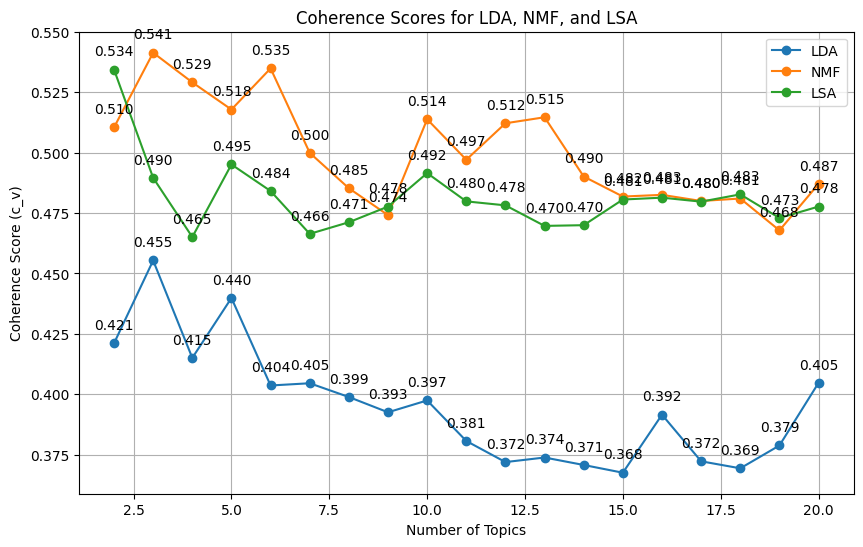

In [ ]:
import matplotlib.pyplot as plt
from gensim.models.ldamodel import LdaModel
from sklearn.decomposition import NMF, TruncatedSVD

# Function to compute coherence values for LDA
def compute_coherence_lda(corpus, dictionary, k_min, k_max, step=1, max_iter=400):
    coherence_values = []
    topic_nums = list(range(k_min, k_max + 1, step))

    for num_topics in topic_nums:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, iterations=max_iter)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_lda.get_coherence())

    return topic_nums, coherence_values

# Function to compute coherence values for NMF
def compute_coherence_nmf(data_vectorized, terms, dictionary, k_min, k_max, step=1, max_iter=400):
    coherence_values = []
    topic_nums = list(range(k_min, k_max + 1, step))

    for num_topics in topic_nums:
        nmf = NMF(n_components=num_topics, random_state=42, max_iter=max_iter)
        nmf.fit(data_vectorized)

        nmf_topics = []
        for topic_idx, topic_weights in enumerate(nmf.components_):
            top_word_indices = topic_weights.argsort()[::-1][:10]
            nmf_topics.append([terms[i] for i in top_word_indices])

        coherence_model_nmf = CoherenceModel(topics=nmf_topics, texts=data_ready, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_nmf.get_coherence())

    return topic_nums, coherence_values

# Function to compute coherence values for LSA
def compute_coherence_lsa(data_vectorized, terms, dictionary, k_min, k_max, step=1, max_iter=400):
    coherence_values = []
    topic_nums = list(range(k_min, k_max + 1, step))

    for num_topics in topic_nums:
        lsa = TruncatedSVD(n_components=num_topics, random_state=42, n_iter=max_iter)
        lsa.fit(data_vectorized)

        lsa_topics = []
        for topic_idx, topic_weights in enumerate(lsa.components_):
            top_word_indices = topic_weights.argsort()[::-1][:10]
            lsa_topics.append([terms[i] for i in top_word_indices])

        coherence_model_lsa = CoherenceModel(topics=lsa_topics, texts=data_ready, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_lsa.get_coherence())

    return topic_nums, coherence_values

# Step 1: Compute coherence values for each model
k_min, k_max, step = 2, 20, 1
lda_topic_nums, lda_coherence_values = compute_coherence_lda(corpus, id2word, k_min, k_max, step)
nmf_topic_nums, nmf_coherence_values = compute_coherence_nmf(data_vectorized, terms, id2word, k_min, k_max, step)
lsa_topic_nums, lsa_coherence_values = compute_coherence_lsa(data_vectorized, terms, id2word, k_min, k_max, step)

# Step 2: Plot the coherence values
plt.figure(figsize=(10, 6))
plt.plot(lda_topic_nums, lda_coherence_values, label='LDA', marker='o')
plt.plot(nmf_topic_nums, nmf_coherence_values, label='NMF', marker='o')
plt.plot(lsa_topic_nums, lsa_coherence_values, label='LSA', marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')
plt.title('Coherence Scores for LDA, NMF, and LSA')
plt.legend()
plt.grid()

# Annotate each point with its coherence score
for i, txt in enumerate(lda_coherence_values):
    plt.annotate(f"{txt:.3f}", (lda_topic_nums[i], lda_coherence_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(nmf_coherence_values):
    plt.annotate(f"{txt:.3f}", (nmf_topic_nums[i], nmf_coherence_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(lsa_coherence_values):
    plt.annotate(f"{txt:.3f}", (lsa_topic_nums[i], lsa_coherence_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


### Highest Coherence Score of LDA, NMF, LSA

In [ ]:
# Step 1: Prepare Data
# Use CountVectorizer to create a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform([' '.join(doc) for doc in data_ready])  # Join tokens into strings
terms = vectorizer.get_feature_names_out()  # Feature names (vocabulary)

# Create Gensim dictionary and corpus from tokenized data
id2word = Dictionary(data_ready)
corpus = [id2word.doc2bow(text) for text in data_ready]

# Step 2: Set Number of Topics
n_topics = 3  # Fixed number of topics

# Step 3: LDA Model
lda_sklearn = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_sklearn.fit(data_vectorized)

# Convert Scikit-Learn LDA model to Gensim LDA model
lda_gensim = LdaModel(corpus=corpus, id2word=id2word, num_topics=n_topics, random_state=42)

# Compute Coherence Score for LDA
coherence_model_lda = CoherenceModel(model=lda_gensim, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

# Step 4: NMF Model
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(data_vectorized)

# Extract Topics for NMF
nmf_topics = []
nmf_topic_word_distributions = nmf.components_
for topic_idx, topic_weights in enumerate(nmf_topic_word_distributions):
    top_word_indices = topic_weights.argsort()[::-1][:10]
    nmf_topics.append([terms[i] for i in top_word_indices])

# Compute Coherence Score for NMF
coherence_model_nmf = CoherenceModel(topics=nmf_topics, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_nmf = coherence_model_nmf.get_coherence()

# Step 5: LSA Model
lsa = TruncatedSVD(n_components=n_topics, random_state=42)
lsa.fit(data_vectorized)

# Extract Topics for LSA
lsa_topics = []
lsa_topic_word_distributions = lsa.components_
for topic_idx, topic_weights in enumerate(lsa_topic_word_distributions):
    top_word_indices = topic_weights.argsort()[::-1][:10]
    lsa_topics.append([terms[i] for i in top_word_indices])

# Compute Coherence Score for LSA
coherence_model_lsa = CoherenceModel(topics=lsa_topics, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()

# Step 6: Print Coherence Scores
print(f"Coherence Score for LDA (n_topics={n_topics}): {coherence_lda}")
print(f"Coherence Score for NMF (n_topics={n_topics}): {coherence_nmf}")
print(f"Coherence Score for LSA (n_topics={n_topics}): {coherence_lsa}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Coherence Score for LDA (n_topics=3): 0.46601135863491777
Coherence Score for NMF (n_topics=3): 0.541326148695142
Coherence Score for LSA (n_topics=3): 0.5009673875346801


##NMF Topic Modeling & Visualization

In [ ]:
# Fit the NMF model with the optimal number of topics
optimal_num_topics = 3  # Based on your coherence score plot
nmf = NMF(n_components=optimal_num_topics, random_state=42, max_iter=400)
nmf.fit(data_vectorized)

# Get the feature names (words) from the vectorizer
terms = vectorizer.get_feature_names_out()

# Extract the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_word_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words.append([feature_names[i] for i in top_word_indices])
    return top_words

# Number of top words to extract
n_top_words = 10
top_words = get_top_words(nmf, terms, n_top_words)

# Print the top words for each topic
for topic_idx, words in enumerate(top_words):
    print(f"Topic {topic_idx + 1}: {', '.join(words)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Topic 1: moment, favorite, buy, final, player, sell, mint, debut, series, dunk
Topic 2: pack, drop, rare, buy, open, pull, today, rip, good, new
Topic 3: like, set, thank, team, time, love, game, think, make, good


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


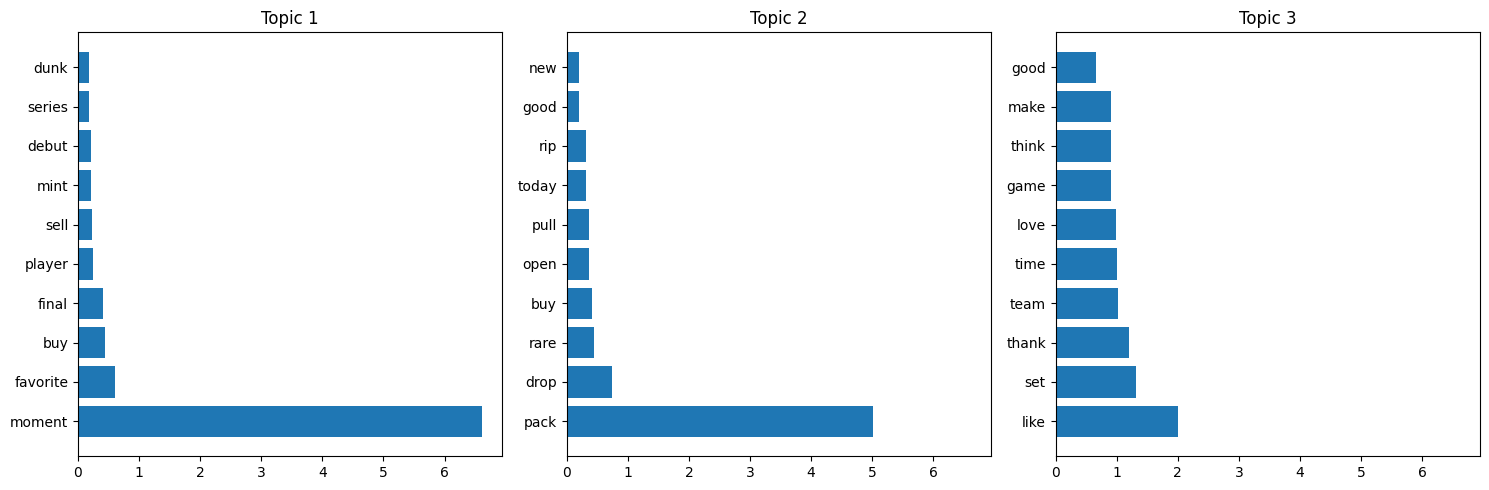

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

# Fit the NMF model with the optimal number of topics
optimal_num_topics = 3  # Based on your coherence score plot
nmf = NMF(n_components=optimal_num_topics, random_state=42, max_iter=400)
nmf.fit(data_vectorized)

# Get the feature names (words) from the vectorizer
terms = vectorizer.get_feature_names_out()

# Extract the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_word_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words.append([feature_names[i] for i in top_word_indices])
    return top_words

# Number of top words to extract
n_top_words = 10
top_words = get_top_words(nmf, terms, n_top_words)

# Plot the top words for each topic
fig, axes = plt.subplots(1, optimal_num_topics, figsize=(15, 5), sharex=True)
axes = axes.flatten()
for topic_idx, words in enumerate(top_words):
    ax = axes[topic_idx]
    ax.barh(words, nmf.components_[topic_idx, [terms.tolist().index(word) for word in words]])
    ax.set_title(f"Topic {topic_idx + 1}")
plt.tight_layout()
plt.show()

## LSA Topic Modeling & Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


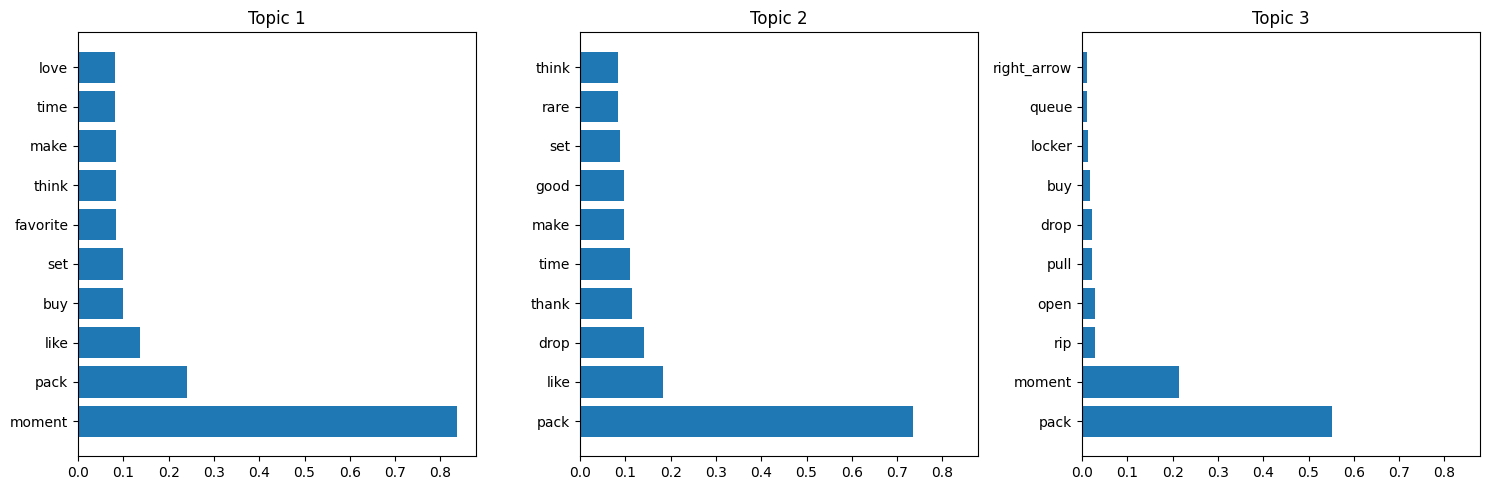

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Fit the LSA model with the optimal number of topics
optimal_num_topics = 3  # Based on your coherence score plot
lsa = TruncatedSVD(n_components=optimal_num_topics, random_state=42, n_iter=400)
lsa.fit(data_vectorized)

# Get the feature names (words) from the vectorizer
terms = vectorizer.get_feature_names_out()

# Extract the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_word_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words.append([feature_names[i] for i in top_word_indices])
    return top_words

# Number of top words to extract
n_top_words = 10
top_words = get_top_words(lsa, terms, n_top_words)

# Plot the top words for each topic
fig, axes = plt.subplots(1, optimal_num_topics, figsize=(15, 5), sharex=True)
axes = axes.flatten()
for topic_idx, words in enumerate(top_words):
    ax = axes[topic_idx]
    ax.barh(words, lsa.components_[topic_idx, [terms.tolist().index(word) for word in words]])
    ax.set_title(f"Topic {topic_idx + 1}")
plt.tight_layout()
plt.show()

##4. Word2Vec & UMAP

In [ ]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data_ready, min_count = 1, vector_size = 10, window = 5)

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data_ready, min_count = 1, vector_size = 40,
                                             window = 5, sg = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
model2.save("/content/drive/MyDrive/Data/NFT/NBATS_skip_gram_w2v.model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
model = Word2Vec.load("/content/drive/MyDrive/Data/NFT/NBATS_skip_gram_w2v.model")
reducer = UMAP(n_neighbors = 5, n_components = 2, verbose = True)

X = model.wv[model.wv.index_to_key]
X_l = model.wv.index_to_key

cluster_embedding = reducer.fit_transform(X)
df = pd.DataFrame(cluster_embedding)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


UMAP(n_neighbors=5, verbose=True)
Thu Nov 28 14:38:17 2024 Construct fuzzy simplicial set
Thu Nov 28 14:38:17 2024 Finding Nearest Neighbors
Thu Nov 28 14:38:17 2024 Building RP forest with 9 trees
Thu Nov 28 14:38:23 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	 7  /  13
	Stopping threshold met -- exiting after 7 iterations
Thu Nov 28 14:38:42 2024 Finished Nearest Neighbor Search
Thu Nov 28 14:38:48 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Nov 28 14:38:56 2024 Finished embedding


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


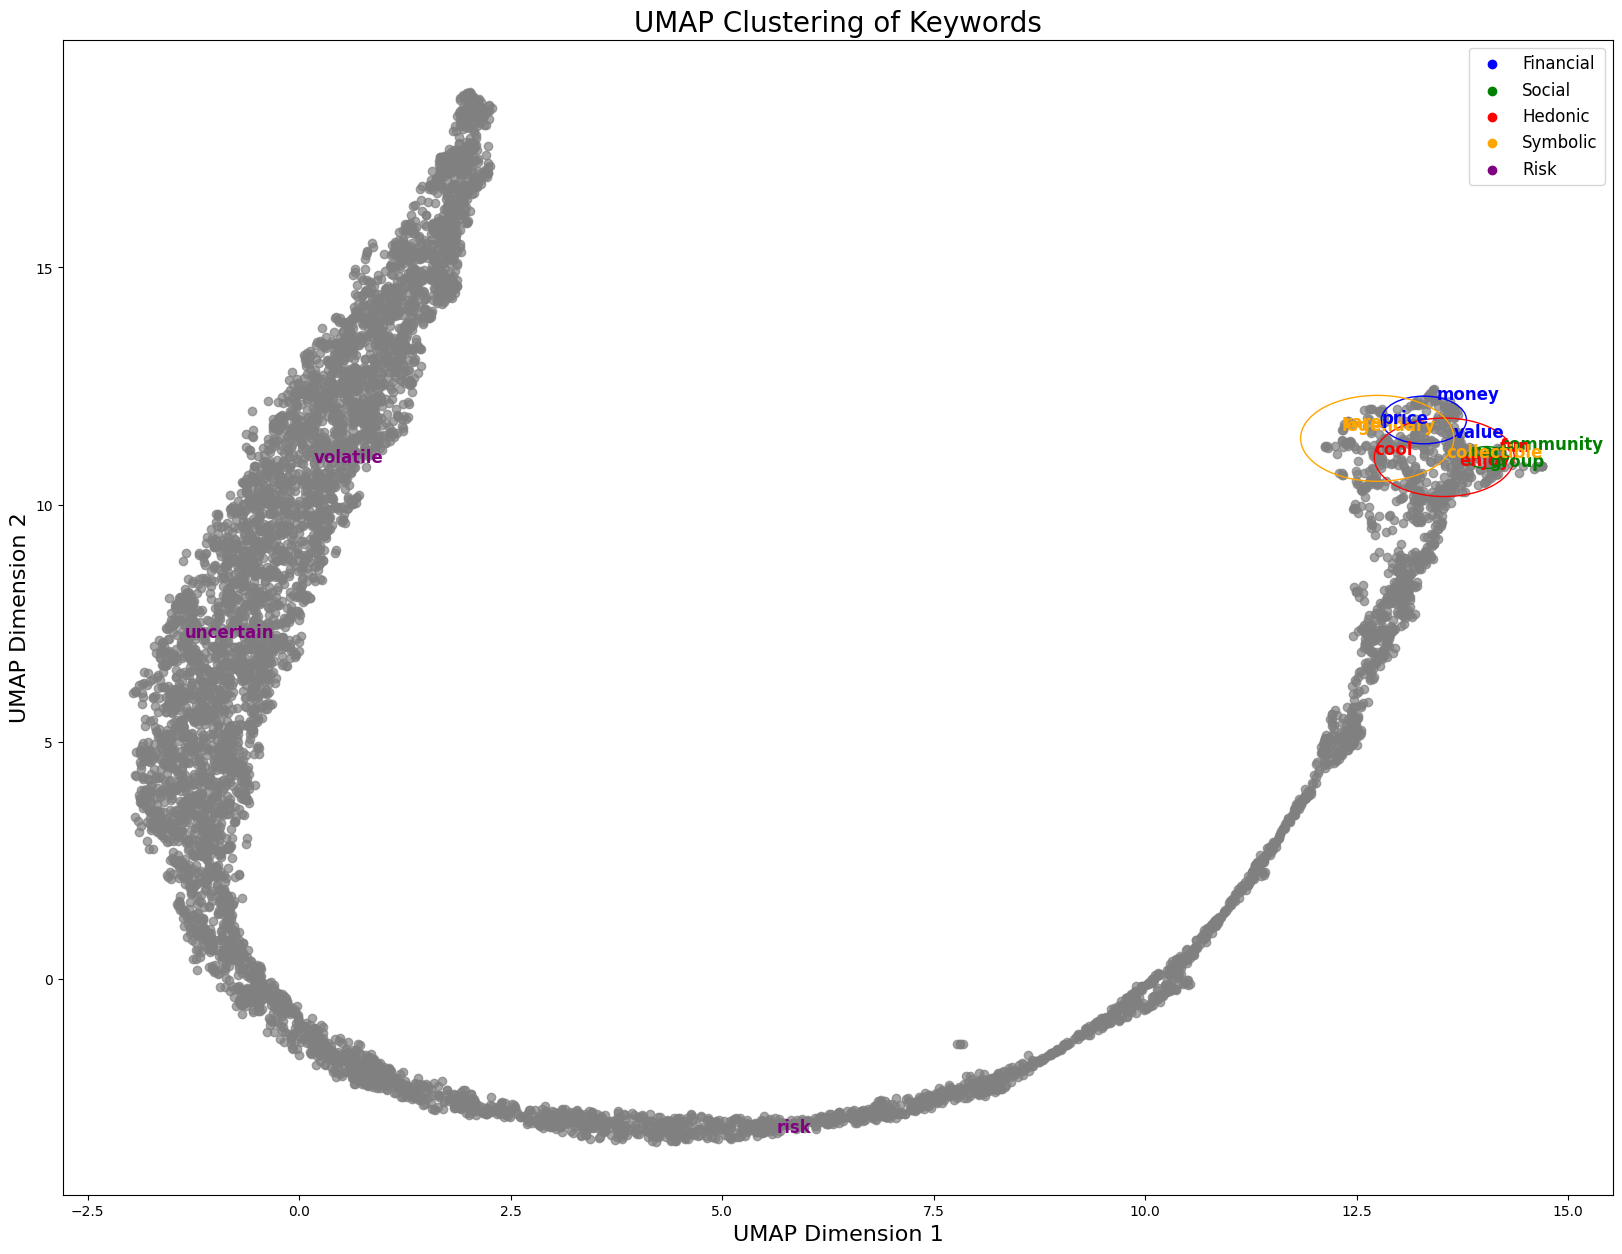

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define keyword clusters and their respective colors
keyword_clusters = {
    'Financial': {'keywords': ['price', 'money', 'value'], 'color': 'blue'},
    'Social': {'keywords': ['community', 'group', 'part'], 'color': 'green'},
    'Hedonic': {'keywords': ['fun', 'enjoy', 'cool'], 'color': 'red'},
    'Symbolic': {'keywords': ['legendary', 'rare', 'collectible'], 'color': 'orange'},
    'Risk': {'keywords': ['risk', 'volatile', 'uncertain'], 'color': 'purple'},
}

# Plot the UMAP scatterplot
fig = plt.figure()
fig.set_size_inches(20, 15)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df[0], df[1], alpha=0.7, color='gray')  # Background scatterplot

# Annotate keywords based on their cluster and collect points for circles
cluster_points = {cluster: [] for cluster in keyword_clusters}
for i, txt in enumerate(X_l):
    for cluster, details in keyword_clusters.items():
        if txt in details['keywords']:
            ax.annotate(
                txt,
                (df.loc[i][0], df.loc[i][1]),
                color=details['color'],
                fontsize=12,
                weight='bold'
            )
            cluster_points[cluster].append((df.loc[i][0], df.loc[i][1]))

# Draw circles around clusters with solid lines and thinner width (excluding Risk cluster)
for cluster, points in cluster_points.items():
    if points and cluster != "Risk":
        points = np.array(points)
        center = points.mean(axis=0)
        radius = np.linalg.norm(points - center, axis=1).max()
        circle = plt.Circle(center, radius, color=keyword_clusters[cluster]['color'], fill=False, linestyle='-', linewidth=1)
        ax.add_patch(circle)

# Add title and labels for clarity
ax.set_title('UMAP Clustering of Keywords', fontsize=20)
ax.set_xlabel('UMAP Dimension 1', fontsize=16)
ax.set_ylabel('UMAP Dimension 2', fontsize=16)

# Create a legend for the clusters
for cluster, details in keyword_clusters.items():
    ax.scatter([], [], color=details['color'], label=cluster)

ax.legend(fontsize=12)

plt.show()

##5. VADER Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Create an instance of the SentimentIntensityAnalyzer class and define a function to calculate the sentiment score:
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/NFT/NBATS201001_230218_USonly_10000.csv")

# Apply the VADER sentiment analysis function to the 'text' column
df['sentiment_score'] = df['text'].apply(get_vader_sentiment_score)

# Extract positive, negative, neutral, and compound scores into separate columns
df['positive_score'] = df['sentiment_score'].apply(lambda x: x['pos'])
df['negative_score'] = df['sentiment_score'].apply(lambda x: x['neg'])
df['neutral_score'] = df['sentiment_score'].apply(lambda x: x['neu'])
df['compound_score'] = df['sentiment_score'].apply(lambda x: x['compound'])

# Calculate the average scores for each sentiment component
average_positive_score = df['positive_score'].mean()
average_negative_score = df['negative_score'].mean()
average_neutral_score = df['neutral_score'].mean()
average_compound_score = df['compound_score'].mean()

# Print the average sentiment scores
print("Average Positive Score:", average_positive_score)
print("Average Negative Score:", average_negative_score)
print("Average Neutral Score:", average_neutral_score)
print("Average Compound Score:", average_compound_score)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Average Compound Score: 0.23599888000000002


## 2. EDA(Explanatory Data Analysis)




*   Word Frequency distribution plot
*   List item



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


67041 words total, with a vocabulary size of 8925
Max tweet length is 34


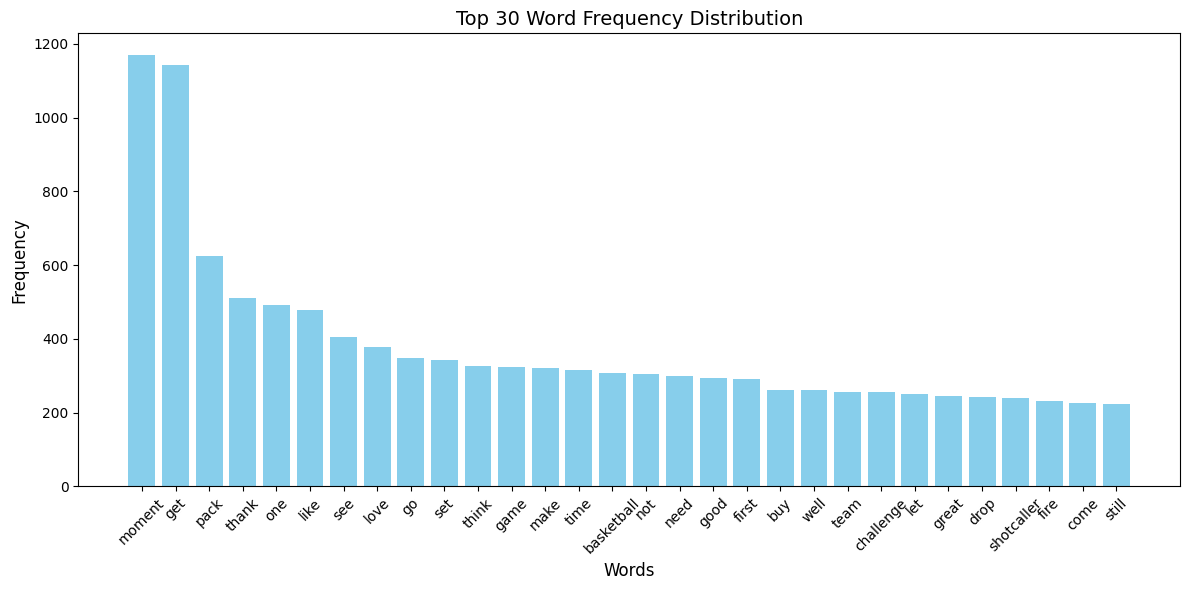

In [ ]:
# Extract all words
all_words = [word for tokens in df['tokenized_text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['tokenized_text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

# Flatten token lists
flat_words = [item for sublist in df['tokenized_text'] for item in sublist]

# Compute word frequencies
word_freq = FreqDist(flat_words)

# Get the top 30 most frequent words
top_words = word_freq.most_common(30)

# Separate words and frequencies for plotting
x_axis = [word for word, freq in top_words]
y_axis = [freq for word, freq in top_words]

# Plot as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(x_axis, y_axis, color='skyblue')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 30 Word Frequency Distribution', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


##Junk

In [ ]:
# access vector for one word
print(w2v['price'])

#[-0.04609262 -0.04943436 -0.08968851 -0.08428907  0.01970964]

#list the vocabulary words
words = list(w2v.wv.vocab)

print(words)

#or show the dictionary of vocab words
w2v.wv.vocab

In [ ]:
X = w2v[w2v.wv.vocab]
pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(w2v.wv.vocab)

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [ ]:
#removing unwanted columns for this analysis
df.drop(columns = ['id', 'created_at', 'author_id','in_reply_to_user_id', 'lang', 'author', 'entities', 'referenced_tweets', 'media', 'geo'], inplace = True)



In [ ]:
#remove urls from text first
def remove_urls(text):
    return re.sub(r'http\S+','', text)

df['text'] = df['text'].apply(remove_urls)

In [ ]:
stop_words = stopwords.words('english')
new_words=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'https', 't.co', 'rt', 't', 'retw', 'retweet',
               'nft', 'nfts', 'hday', 'still', 'nbatopshot', 'chasegeer', 'le')
for i in new_words:
    stop_words.append(i)
print(stop_words)

In [ ]:
#add punctuation char's to stopwords list
stop_words += list(string.punctuation)

In [ ]:
#stop_words
def process_text(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

df['text'] = df['text'].apply(process_text)

In [ ]:
test = list(df['text'][15:20])
test[2]

In [ ]:
list(filter(lambda x: x.isalpha(), test[2]))


In [ ]:
def remove_nums(text_object):
    no_nums = list(filter(lambda x: x.isalpha(), text_object))
    return no_nums

df['text'] = df['text'].apply(remove_nums)

In [ ]:
df['text'].head()


In [ ]:
#Lemmatize
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

df['text'] = df['text'].apply(lemmatize_text)


In [ ]:
testers = list(df['text'][15:20])


In [ ]:
other_tester = list(df['text'][1000])

In [ ]:
print(other_tester)


In [ ]:
print(testers)


In [ ]:
#Examine Vocab and Frequency Distributions
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

In [ ]:
flat_words = [item for sublist in df['text'] for item in sublist]


In [ ]:
word_freq = FreqDist(flat_words)


In [ ]:
word_freq.most_common(30)


In [ ]:
#preprocess steps as one function
lemmatizer = WordNetLemmatizer()

def preprocess(df_text):
    tokens = word_tokenize(df_text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words and len(token) > 3]

    lemmatized =[]

    for w in stopwords_removed:
        lemmatized.append(lemmatizer.lemmatize(w))

    processed = list(filter(lambda x: x.isalpha(), lemmatized))

    return processed

In [ ]:
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

In [ ]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df['text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

In [ ]:
#retrieve word and count from FreqDist tuples

most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

In [ ]:
top_30_dictionary

In [ ]:
api_key = "yIBBjGJ9jfNUvZh8UTyJuu7KN"
api_key_secret = "NQWgR6N6hWaFFysGIquiGHISwWohvo3NOHktUzYwle6EeJtlYL"
access_key= "1590044677817786369-ftADUBJJKlNiIhYMMFLRuSmMQtIboZ"
access_key_secret = "pKWO5eu3s9pIle61yNFCADXpQ4M2elhKWxqMmHSUaYGgx"

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_key, access_key_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

csvFile = open('file-name', 'a')
csvWriter = csv.writer(csvFile)

search_words = NBAtopshot or collect or buy
new_search = search_words + -filter:retweet

for tweet in tweepy.Cursor(api.search,q=new_search,count=100,
                           lang="en",
                           since_id=0).items():
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])
